# During the lockdown I published my first book titled Inspiration:Thoughts on Spirituality,Technology,Wealth,Leadership and Motivation.The preview of the book can be read from the Amazon link https://lnkd.in/gj7bMQA .
# E Book is availabe for Rs 99 in India.Paperback Edition of the book is available on Amazon.com link https://lnkd.in/gkFYYMJ

In this kernel we will try to predict the sales at the Rossman store.We will be covering following topics.

1.Data importing 

2.Visualization and EDA (Exploratory Data Analysis)

3.Feature Engineering 

4.Model Build 

5.Model Evaluation

6.Conclusion 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rossmann-store-sales/sample_submission.csv
/kaggle/input/rossmann-store-sales/store.csv
/kaggle/input/rossmann-store-sales/train.csv
/kaggle/input/rossmann-store-sales/test.csv


# 1. Data Import 

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

### Importing the data

In [3]:
train = pd.read_csv('../input/rossmann-store-sales/train.csv')
test = pd.read_csv('../input/rossmann-store-sales/test.csv')
store = pd.read_csv('../input/rossmann-store-sales/store.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Shape of Data

In [4]:
print('Training Data Shape:',train.shape)
print('Test Data Shape:',test.shape)
print('Store Data Shape:',store.shape)

Training Data Shape: (1017209, 9)
Test Data Shape: (41088, 8)
Store Data Shape: (1115, 10)


We have more than 10 lac rows of data in train dataset.So this is quite large dataset.We have data of more than 1000 rows for store.

### Displaying Data

In [5]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


We can see that all the three sheets train,test and store have the common row of store.This column of data would be useful for us to concanate the data in future.

### Store Status

In [7]:
not_open = train[(train['Open']==0) & (train['Sales'] !=0)]
print("No closed store with sales:"+ str(not_open.size ==0))

no_sales = train[(train['Open']==1) & (train['Sales'] <=0)]
print("Open store with no sales:"+ str(no_sales.size ==0))

No closed store with sales:True
Open store with no sales:False


So here we have checked if there are any closed stores showing sales and also if there stores which are open but have no sales.Both the things are not present in the data.So our data is quite clean in this regard.

### Removing Stores with Sales less than Zero

In [8]:
train = train.loc[train['Sales']>0]

From the train dataset we have removed stores which have less than 0 sales.This case is odd as all sales will have positive value of sales.Sometimes items being returned back to the store can be marked as negative.

In [9]:
print('New Training Data Shape : ',train.shape)

New Training Data Shape :  (844338, 9)


So by removing the negative sales value our row od data in training set have come down from 1017209 to 844338

### Date time conversion

In [10]:
dates = pd.to_datetime(train['Date']).sort_values()
dates = dates.unique()
start_date = dates[0]
end_date = dates[-1]
print("Start date: ",start_date)
print("End date: ",end_date)
date_range = pd.date_range(start_date,end_date).values

Start date:  2013-01-01T00:00:00.000000000
End date:  2015-07-31T00:00:00.000000000


# 2.Visualization and EDA (Exploratory Data Analysis)

In [11]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


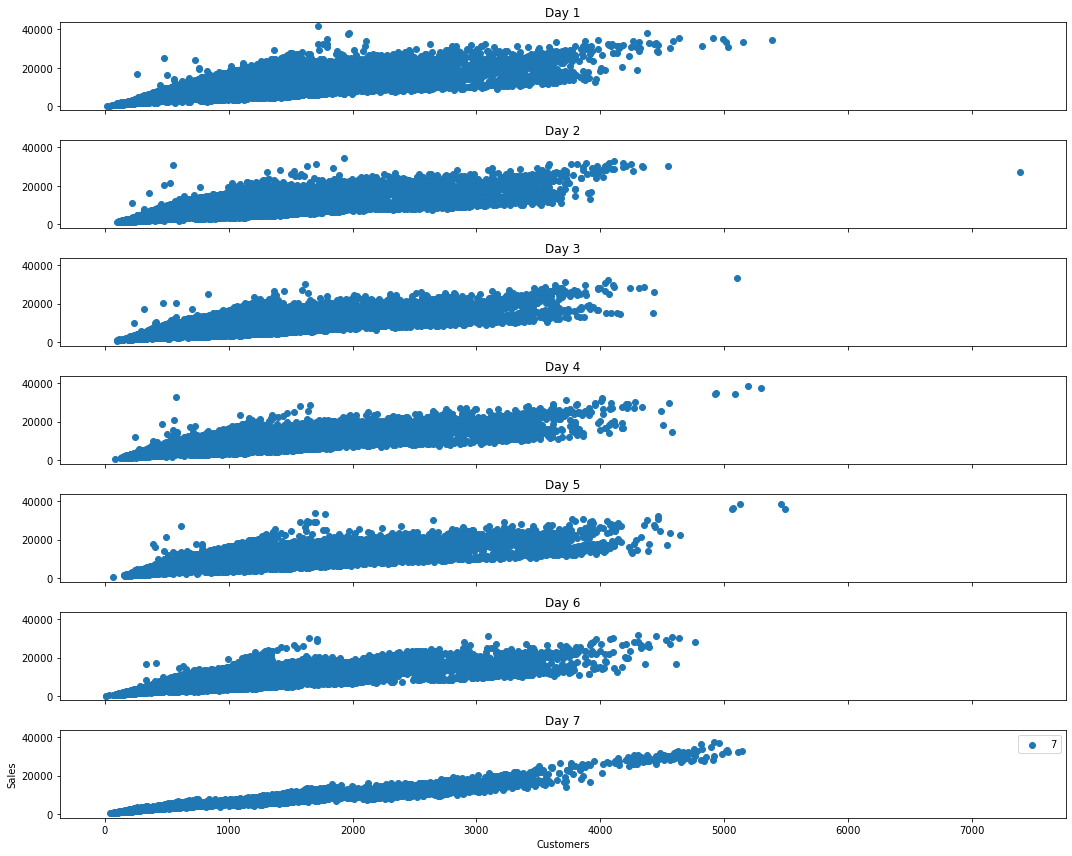

In [12]:
plt.rcParams['figure.figsize'] = (15.0,12.0)

f,ax = plt.subplots(7, sharex=True, sharey=True)
for i in range(1,8):
    data = train[train['DayOfWeek'] == i ]
    ax[i - 1].set_title("Day {0}".format(i))
    ax[i - 1].scatter(data['Customers'],data['Sales'],label=i)
    
plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

From the above plot we can make out that Day 1 ( Monday) has high sales compared to weekend Day 6 (Saturday) and Day 7 (Sunday).

### Customer Vs Sales of Different Days of the Week

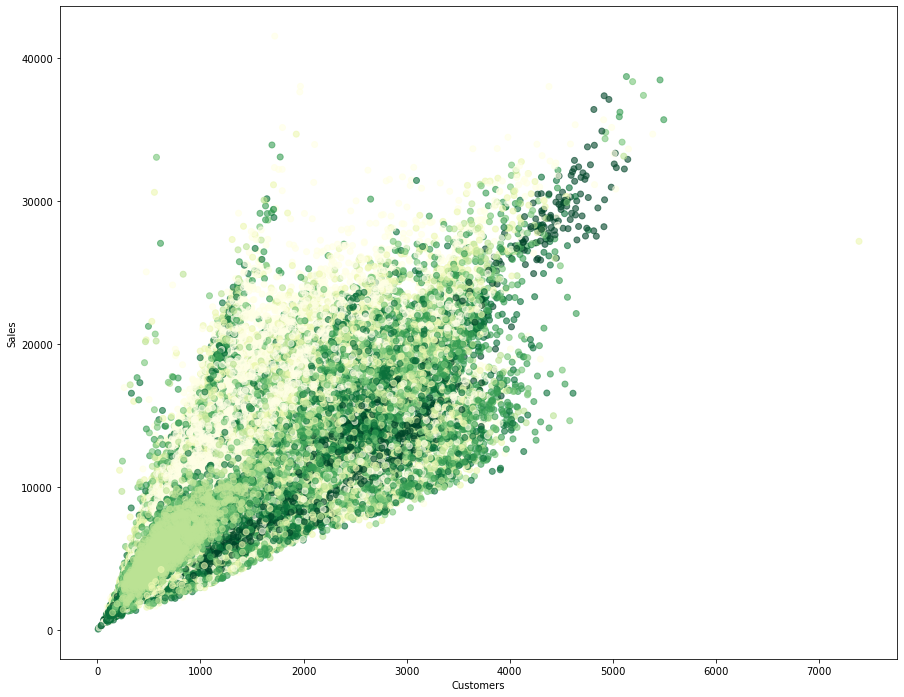

In [13]:
plt.scatter(train['Customers'], train['Sales'], c=train['DayOfWeek'],alpha=0.6,cmap=plt.cm.get_cmap('YlGn'))

plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

### School Holiday Vs Sales 

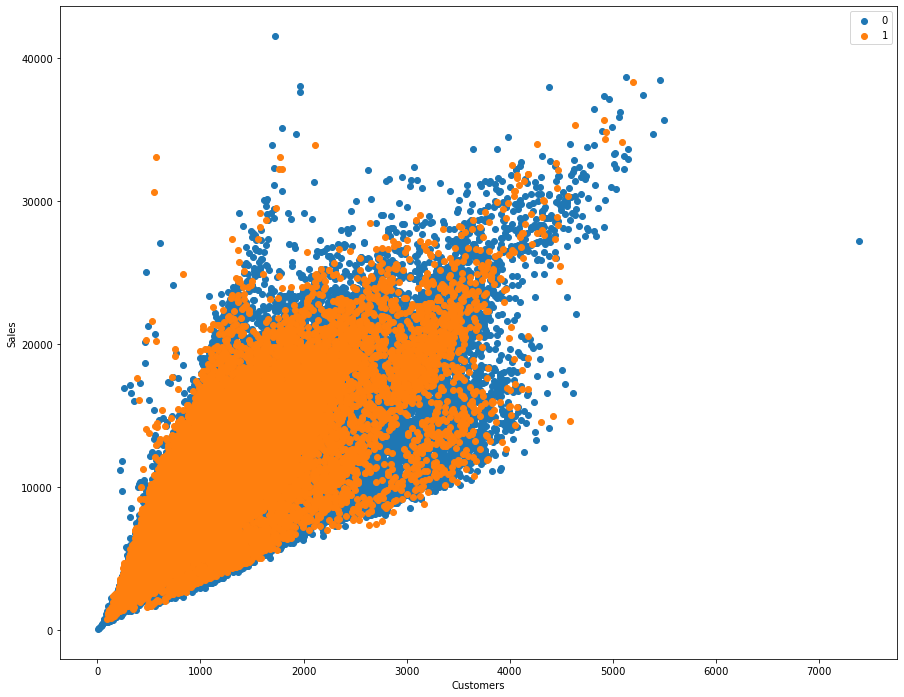

In [14]:
for i in [0,1]:
    data = train[train['SchoolHoliday'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['Customers'], data['Sales'], label = i)
    
plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

School Holidays doesnt have much impact on sales at the store.

### Effect of Promo Code on Sales 

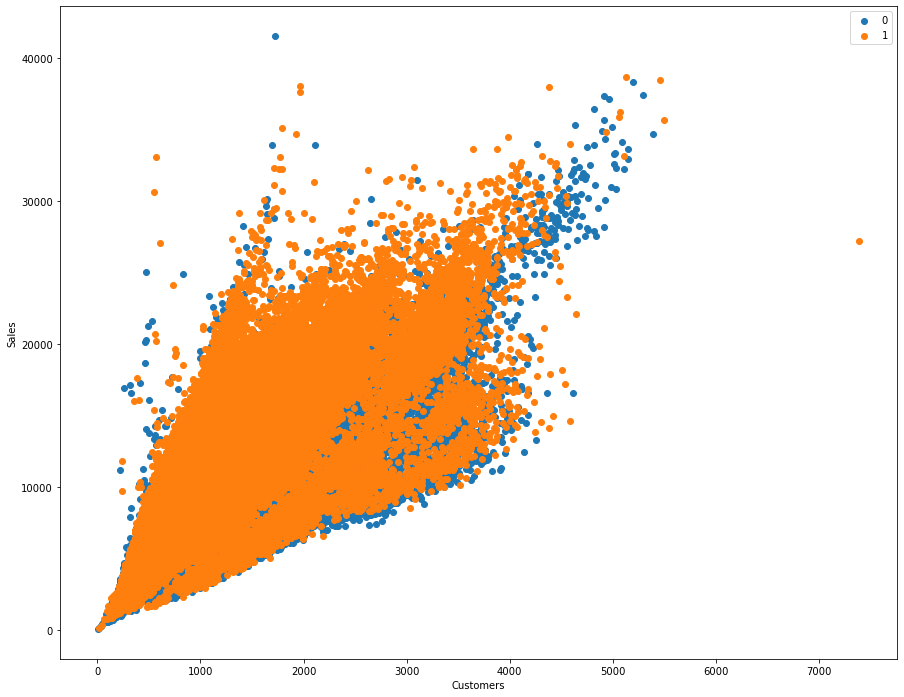

In [15]:
for i in [0,1]:
    data = train[train['Promo'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['Customers'], data['Sales'], label = i)
    
plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

We know by intution that promo code should have an effect on sales.We can confirm from the above plot that promo code did have an affect on the sales.

In [16]:
train.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1


In [17]:
train['SalesPerCustomer'] = train['Sales']/train['Customers']

avg_store = train.groupby("Store")[['Sales','Customers','SalesPerCustomer']].mean()
avg_store.rename(columns = lambda x: 'Avg' + x,inplace=True)
store = pd.merge(avg_store.reset_index(),store,on='Store')
store.head()

,Store,AvgSales,AvgCustomers,AvgSalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4759.096031,564.049936,8.393038,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,4953.900510,583.998724,8.408443,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,6942.568678,750.077022,9.117599,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,9638.401786,1321.752551,7.249827,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,4676.274711,537.340180,8.611229,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [18]:
avg_store.head()

,AvgSales,AvgCustomers,AvgSalesPerCustomer
Store,,,
1,4759.096031,564.049936,8.393038
2,4953.900510,583.998724,8.408443
3,6942.568678,750.077022,9.117599
4,9638.401786,1321.752551,7.249827
5,4676.274711,537.340180,8.611229


So now we have calculated Average sales, Average customer and Average Sales per customer.So we have created new features which will be very useful for us o make the sales prediction.

### Average Customer Vs Average Sales 

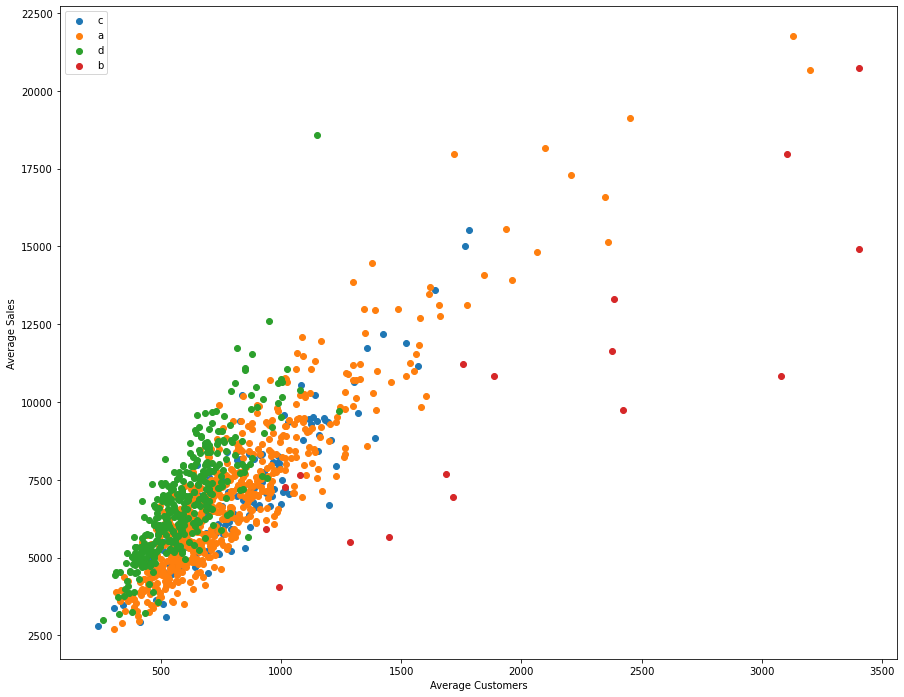

In [19]:
for i in store.StoreType.unique():
    data = store[store['StoreType'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['AvgCustomers'],data['AvgSales'],label=i)
    
plt.legend()
plt.xlabel('Average Customers')
plt.ylabel('Average Sales')
plt.show()

Here we have plotted a scatter plot with store type as hue.We can clearly see that as the average customers increases at the store the sales increases.This is quite Natural.

We can see that store type b has more Average Customers and sales.This may be because the store type b is in urban areas or it sells products which are more in demand.

In [20]:
store.Promo2.unique()

array([0, 1])

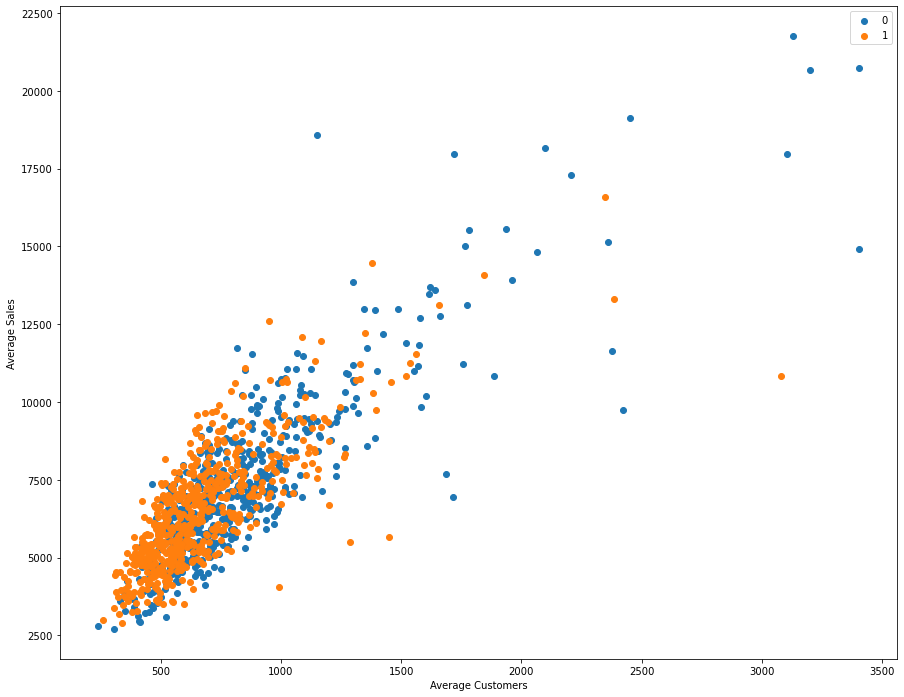

In [21]:
for i in store.Promo2.unique():
    data = store[store['Promo2'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['AvgCustomers'],data['AvgSales'],label=i)
    
plt.legend()
plt.xlabel('Average Customers')
plt.ylabel('Average Sales')
plt.show()

We can see that promo codes do increase the sales.

# 3.Feature Engineering 

In [22]:
store.isnull().sum()

Store                          0
AvgSales                       0
AvgCustomers                   0
AvgSalesPerCustomer            0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

There are only three missing values in competition distance.We can replace the missing value with value -1.

### Competition Distance Vs Average Sales

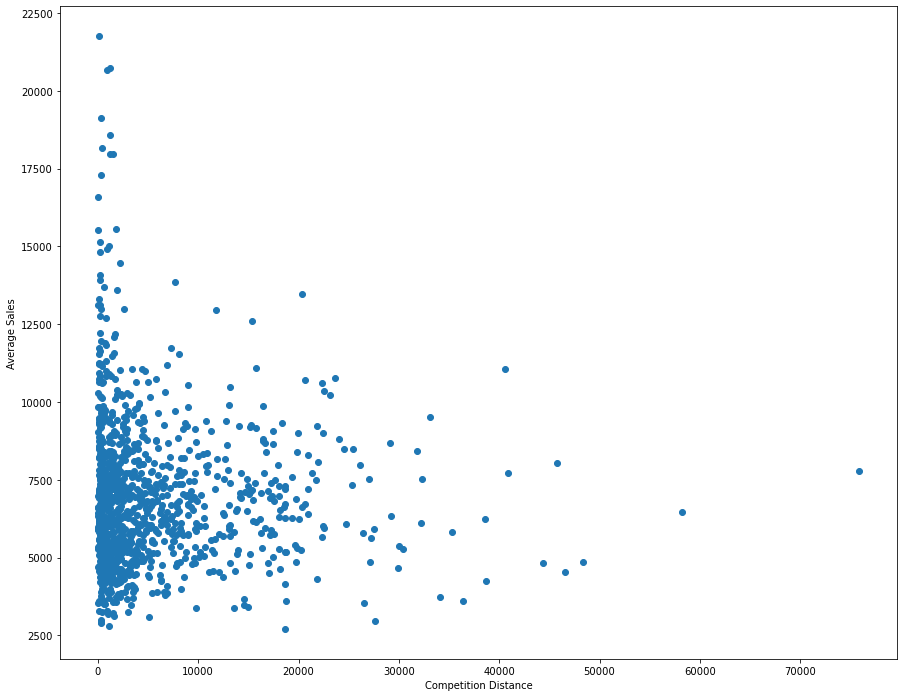

In [23]:
store["CompetitionDistance"].fillna(-1)

plt.scatter(store['CompetitionDistance'],store['AvgSales'])

plt.xlabel('Competition Distance')
plt.ylabel('Average Sales')
plt.show()

Competition Distance is the distance of other store with the Rossmann Store.We can see that when the competition disance is low then the sales is more.This is counter intutive that if there are competitors aroud you then your sales is also more.

This is because store are more in urban areas. And in urban areas the stores of competitors are also present.Sales happen more in Urban areas that is why even if competitors are nearby the sales are more.

In [24]:
store.head()

,Store,AvgSales,AvgCustomers,AvgSalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4759.096031,564.049936,8.393038,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,4953.900510,583.998724,8.408443,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,6942.568678,750.077022,9.117599,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,9638.401786,1321.752551,7.249827,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,4676.274711,537.340180,8.611229,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Changing the column types to category

In [25]:
store['StoreType'] = store['StoreType'].astype('category').cat.codes
store['Assortment'] = store['Assortment'].astype('category').cat.codes
train['StateHoliday'] = train['StateHoliday'].astype('category').cat.codes
store.head()

,Store,AvgSales,AvgCustomers,AvgSalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4759.096031,564.049936,8.393038,2,0,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,4953.900510,583.998724,8.408443,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,6942.568678,750.077022,9.117599,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,9638.401786,1321.752551,7.249827,2,2,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,4676.274711,537.340180,8.611229,0,0,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Merging Train and Store Dataset

In [26]:
merged = pd.merge(train,store,on='Store',how='left')
merged.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,...,AvgSalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,1,1,9.482883,...,8.393038,2,0,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,1,1,9.702400,...,8.408443,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,1,1,10.126675,...,9.117599,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,1,1,9.342457,...,7.249827,2,2,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,1,1,8.626118,...,8.611229,0,0,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [27]:
merged.shape

(844338, 22)

In [28]:
merged.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
SalesPerCustomer                  0
AvgSales                          0
AvgCustomers                      0
AvgSalesPerCustomer               0
StoreType                         0
Assortment                        0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268600
CompetitionOpenSinceYear     268600
Promo2                            0
Promo2SinceWeek              423292
Promo2SinceYear              423292
PromoInterval                423292
dtype: int64

### Replacing Missing Values with 0

In [29]:
merged.fillna(0, inplace = True)

### Changing Date to Datetime 

In [30]:
merged['Date'] = pd.to_datetime(merged['Date'])
merged.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                           int8
SchoolHoliday                         int64
SalesPerCustomer                    float64
AvgSales                            float64
AvgCustomers                        float64
AvgSalesPerCustomer                 float64
StoreType                              int8
Assortment                             int8
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object

In [31]:
merged['Year'] = merged.Date.dt.year
merged['Month'] = merged.Date.dt.month
merged['Day'] = merged.Date.dt.day
merged['Week'] = merged.Date.dt.week
merged.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,Week
0,1,5,2015-07-31,5263,555,1,1,1,1,9.482883,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,1,1,9.702400,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,1,1,10.126675,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,1,1,9.342457,...,9.0,2009.0,0,0.0,0.0,0,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,1,1,8.626118,...,4.0,2015.0,0,0.0,0.0,0,2015,7,31,31


### Creating New Features

In [32]:
merged['MonthsCompetitionOpen'] = 12 * (merged['Year']) - merged['CompetitionOpenSinceYear'] + (merged['Month'] - merged['CompetitionOpenSinceMonth'])
merged.loc[merged['CompetitionOpenSinceYear'] == 0, 'MonthsCompetitionOpen'] = 0

In [33]:
merged['WeeksPromoOpen'] = 12 * (merged['Year'] - merged['Promo2SinceYear']) + (merged['Date'].dt.weekofyear - merged['Promo2SinceWeek'])
merged.loc[merged['Promo2SinceYear'] == 0, 'WeeksPromoOpen'] = 0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [34]:
merged.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                           int8
SchoolHoliday                         int64
SalesPerCustomer                    float64
AvgSales                            float64
AvgCustomers                        float64
AvgSalesPerCustomer                 float64
StoreType                              int8
Assortment                             int8
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
Year                            

In [35]:
merged.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,Week,MonthsCompetitionOpen,WeeksPromoOpen
0,1,5,2015-07-31,5263,555,1,1,1,1,9.482883,...,0,0.0,0.0,0,2015,7,31,31,22170.0,0.0
1,2,5,2015-07-31,6064,625,1,1,1,1,9.702400,...,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,22169.0,78.0
2,3,5,2015-07-31,8314,821,1,1,1,1,10.126675,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,22169.0,65.0
3,4,5,2015-07-31,13995,1498,1,1,1,1,9.342457,...,0,0.0,0.0,0,2015,7,31,31,22169.0,0.0
4,5,5,2015-07-31,4822,559,1,1,1,1,8.626118,...,0,0.0,0.0,0,2015,7,31,31,22168.0,0.0


### Converting Floats to Integer 

In [36]:
toInt = [
        'CompetitionOpenSinceMonth',
        'CompetitionOpenSinceYear',
        'Promo2SinceWeek',
        'Promo2SinceYear',
        'MonthsCompetitionOpen',
        'WeeksPromoOpen']

merged[toInt] = merged[toInt].astype(int)


### Getting Median Values 

In [37]:
med_store = train.groupby('Store')[['Sales','Customers','SalesPerCustomer']].median()
med_store.rename(columns = lambda x : 'Med' + x, inplace = True)

store = pd.merge(med_store.reset_index(), store, on='Store')

In [38]:
store.head()

,Store,MedSales,MedCustomers,MedSalesPerCustomer,AvgSales,AvgCustomers,AvgSalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4647.0,550.0,8.362376,4759.096031,564.049936,8.393038,2,0,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,4783.0,575.5,8.313092,4953.900510,583.998724,8.408443,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,6619.0,744.0,9.123440,6942.568678,750.077022,9.117599,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,9430.5,1301.5,7.215175,9638.401786,1321.752551,7.249827,2,2,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,4616.0,564.0,8.584677,4676.274711,537.340180,8.611229,0,0,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [39]:
merged = pd.merge(med_store.reset_index(),merged, on='Store')
merged.head()
                  

,Store,MedSales,MedCustomers,MedSalesPerCustomer,DayOfWeek,Date,Sales,Customers,Open,Promo,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,Week,MonthsCompetitionOpen,WeeksPromoOpen
0,1,4647.0,550.0,8.362376,5,2015-07-31,5263,555,1,1,...,0,0,0,0,2015,7,31,31,22170,0
1,1,4647.0,550.0,8.362376,4,2015-07-30,5020,546,1,1,...,0,0,0,0,2015,7,30,31,22170,0
2,1,4647.0,550.0,8.362376,3,2015-07-29,4782,523,1,1,...,0,0,0,0,2015,7,29,31,22170,0
3,1,4647.0,550.0,8.362376,2,2015-07-28,5011,560,1,1,...,0,0,0,0,2015,7,28,31,22170,0
4,1,4647.0,550.0,8.362376,1,2015-07-27,6102,612,1,1,...,0,0,0,0,2015,7,27,31,22170,0


We can see that there is not much difference between the median and the average sales.This gives us confidence that the feature are normally distributed or closer to normal distribution.

In [40]:
merged.columns

Index(['Store', 'MedSales', 'MedCustomers', 'MedSalesPerCustomer', 'DayOfWeek',
       'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'SalesPerCustomer', 'AvgSales', 'AvgCustomers',
       'AvgSalesPerCustomer', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'Day', 'Week', 'MonthsCompetitionOpen', 'WeeksPromoOpen'],
      dtype='object')

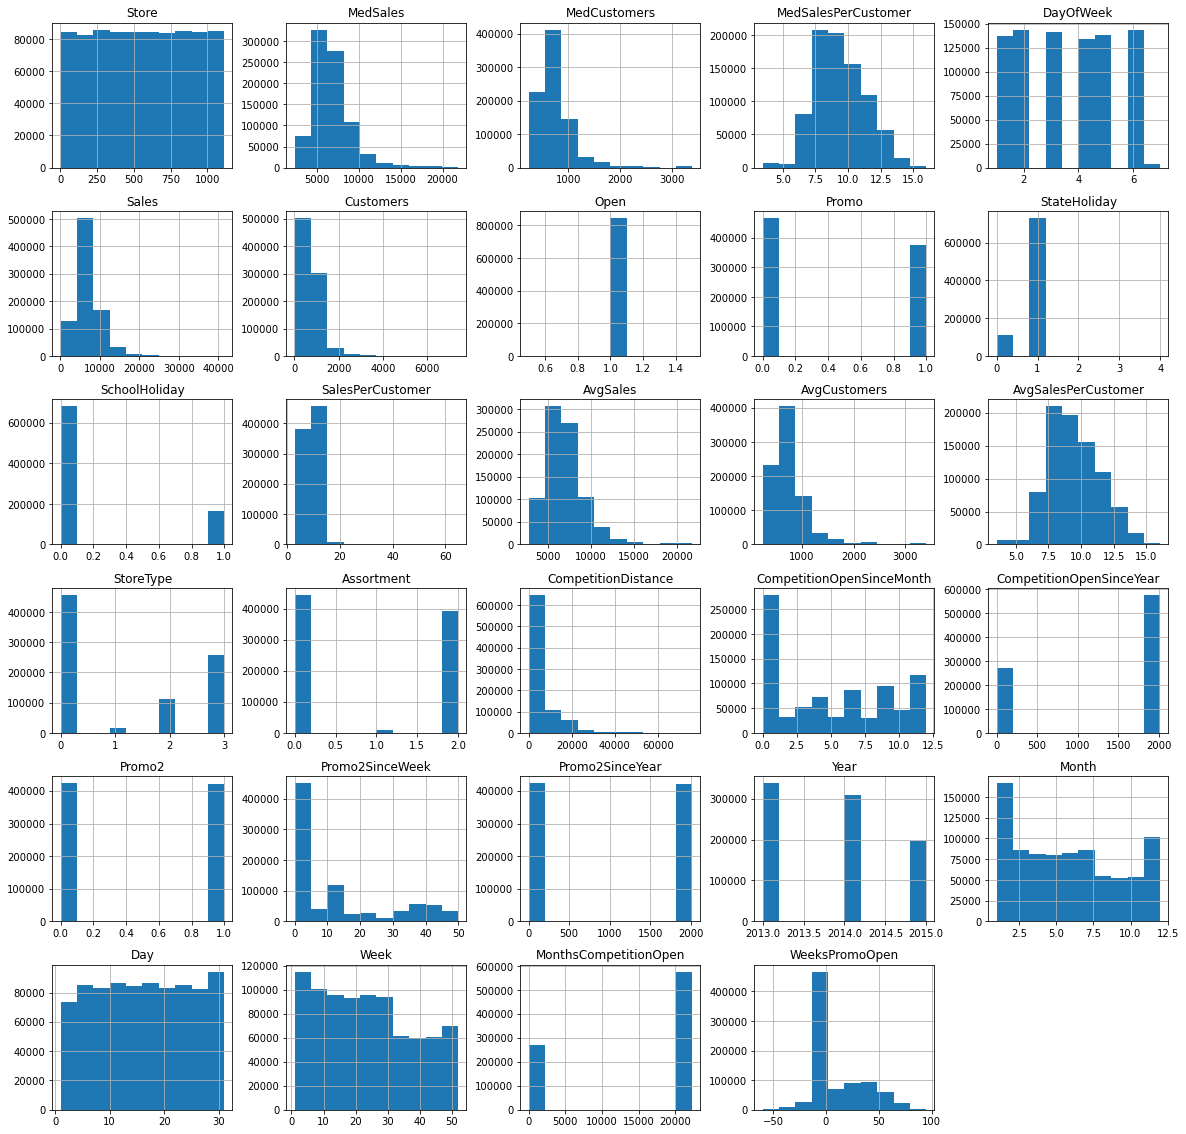

In [41]:
merged.hist(figsize=(20,20))
plt.show()

From the Histograms we can see that the average and the median values have skew.This can affect the accuracy of our predictions.

But for us the sales feature is more important.It is also skewed so first we need to convert sales to a normal distribution to improve the accuaracy of the model.

# 4.Model Built

In [42]:
from sklearn.model_selection import train_test_split

X = [
    'Store',
    'Customers',
    'CompetitionDistance',
    
    'Promo',
    'Promo2',
    
    'CompetitionOpenSinceMonth',
    'CompetitionOpenSinceYear',
    'Promo2SinceWeek',
    'Promo2SinceYear',
    
    'StateHoliday',
    'StoreType',
    'Assortment',
    
    'AvgSales',
    'AvgCustomers',
    'AvgSalesPerCustomer',
    
    'MedSales',
    'MedCustomers',
    'MedSalesPerCustomer',
    
    'DayOfWeek',
    'Week',
    'Day',
    'Month',
    'Year'
    
]

X_data = merged[X]
Y_data = np.log(merged['Sales'])
X_train,X_test,y_train,y_test = train_test_split(X_data,Y_data,test_size=0.2,random_state=0)

In [43]:
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import make_scorer,mean_squared_error 


def plot_importance(model):
    k = list(zip(X,model.feature_importances_))
    k.sort(key=lambda tup: tup[1])
    
    labels, vals = zip(*k)
    
    plt.barh(np.arange(len(X)),vals,align = 'center')
    plt.yticks(np.arange(len(X)),labels)
    
    

In [44]:
import xgboost as xgb 
from sklearn.model_selection import GridSearchCV

param = { 
            'n_estimator': [100,500,1000,1500],
            'max_depth': [2,4,6,8]
         }

xgboost_tree = xgb.XGBRegressor(
    eta = 0.1,
    min_child_weight = 2,
    subsample = 0.8,
    colsample_bytree = 0.8,
    tree_method = 'exact',
    reg_alpha = 0.05,
    silent = 0,
    randm_state = 1023
)

grid = GridSearchCV(estimator = xgboost_tree,param_grid=param,cv=5,verbose=1,n_jobs=-1,scoring='neg_mean_squared_error')

grid_result = grid.fit(X_train,y_train)
best_params = grid_result.best_params_

print('Best Params :',best_params)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 55.0min finished


[05:45:40] WARNING: ../src/learner.cc:516: 
Parameters: { n_estimator, randm_state, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best Params : {'max_depth': 8, 'n_estimator': 100}


# 5.Model Evaluation 

In [45]:
from math import sqrt 

pred = grid_result.predict(X_test)
print('Root Mean squared error {}'.format(sqrt(mean_squared_error(np.exp(y_test),np.exp(pred)))))

Root Mean squared error 409.166772782557


### Different type of Scores 

In [46]:
import sklearn 
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

# 6.Conclusion

1.We have done lot of exploratory data anlysis and got insight on what affects the sales of RossMann stores 

2.We have used XGBoost algorithm to predict the sales of the stores.We can further improve acurracy of the the model by doing further feature engineering and also by trying out different machine learning algorithms.